# Imports

In [1]:
import pandas as pd

# Get data

In [2]:
dataset = pd.read_csv('../data/processed.csv')
dataset.head()

,idade,sexo,imc,criancas,fumante,regiao,valor_pago
0,19,1,27.900,0,1,3,16884.92
1,18,0,33.770,1,0,4,1725.55
2,28,0,33.000,3,0,4,4449.46
3,33,0,22.705,0,0,1,21984.47
4,32,0,28.880,0,0,4,3866.86


# Prepare categorical fields

In [3]:
dataset = pd.get_dummies(dataset, columns=['sexo', 'fumante', 'regiao'], drop_first=True)

In [4]:
dataset.head()

,idade,imc,criancas,valor_pago,sexo_1,fumante_1,regiao_1,regiao_2,regiao_3,regiao_4
0,19,27.900,0,16884.92,True,True,False,False,True,False
1,18,33.770,1,1725.55,False,False,False,False,False,True
2,28,33.000,3,4449.46,False,False,False,False,False,True
3,33,22.705,0,21984.47,False,False,True,False,False,False
4,32,28.880,0,3866.86,False,False,False,False,False,True


# Separation of independent variable and dependent variable

In [5]:
X = dataset.drop('valor_pago', axis=1)
y = dataset['valor_pago']

# Split data to train and test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(len(X_train), "training +", len(X_test), "tests")
print(len(y_train), "training +", len(y_test), "tests")

1070 training + 268 tests
1070 training + 268 tests


# Checking proportion

In [8]:
X_train["fumante_1"].value_counts() / len(X_train)

fumante_1
False    0.794393
True     0.205607
Name: count, dtype: float64

In [9]:
X_test["fumante_1"].value_counts() / len(X_test)

fumante_1
False    0.798507
True     0.201493
Name: count, dtype: float64

# Build model

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluating model

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')
print(f'Mean absolute error: {mae}')

Mean squared error: 33990703.01398821
R2 score: 0.7810564882568775
Mean absolute error: 4216.489806174143


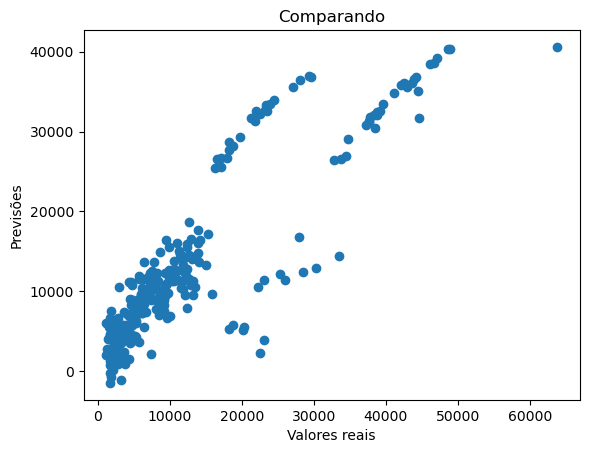

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valores reais")
plt.ylabel("Previsões")
plt.title("Comparando")
plt.show()

In [13]:
from save_model_manager import SaveModelManager

SaveModelManager.save_model(model, "my_model.pkl")

Saved model: my_model.pkl


In [14]:
dataset = dataset.drop(columns=['valor_pago'])
dataset.to_csv("../data/final.csv", index=False)